<a href="https://colab.research.google.com/github/takacsanna/igy_neveld_fakt/blob/main/hazi3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3. házi feladat

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from google.colab import drive
from google.colab import files
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Dense
import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import MeanSquaredError

##Egy év becslése

In [4]:
uploaded=files.upload()

Saving ev.csv to ev.csv


In [5]:
ev=pd.read_csv('ev.csv')

In [44]:
ev.head()

,loc_id,year,month,maxtempC,maxtempF,mintempC,mintempF,avgtempC,avgtempF,rainMM,...,avgwindgustKmph,visibilityKm,visibilityMiles,humidity,pressureMB,pressureInches,cloudcover,sun_hour,sun_days,uvindex
0,1,2009,1,5,41,0,32,2,36,20.82,...,27.6,8,5,88,1011.1,30.3,50,150.0,20,2
1,1,2009,2,6,44,2,35,4,39,31.20,...,21.5,7,4,91,1015.1,30.5,67,85.5,14,3
2,1,2009,3,11,52,3,37,6,44,17.17,...,22.7,8,5,83,1015.0,30.5,51,190.0,21,2
3,1,2009,4,15,59,5,42,10,50,32.18,...,16.0,8,4,81,1013.3,30.4,46,249.0,16,3
4,1,2009,5,17,63,8,46,13,55,19.36,...,20.3,9,5,76,1018.1,30.5,48,246.0,20,5


Felesleges változók elhagyása

In [6]:
print(ev.columns)

Index(['loc_id', 'year', 'month', 'maxtempC', 'maxtempF', 'mintempC',
       'mintempF', 'avgtempC', 'avgtempF', 'rainMM', 'rainInches', 'rain_days',
       'snow_cm', 'snow_days', 'maxwindspeedMiles', 'maxwindspeedKmph',
       'avgwindspeedMiles', 'avgwindspeedKmph', 'avgwindgustMiles',
       'avgwindgustKmph', 'visibilityKm', 'visibilityMiles', 'humidity',
       'pressureMB', 'pressureInches', 'cloudcover', 'sun_hour', 'sun_days',
       'uvindex'],
      dtype='object')


In [7]:
ev=ev.drop(columns=['loc_id','year','month','maxtempF','mintempF','avgtempF','rainInches','maxwindspeedMiles','avgwindspeedMiles','avgwindgustMiles','visibilityMiles','pressureInches'])


In [8]:
ev.head()

,maxtempC,mintempC,avgtempC,rainMM,rain_days,snow_cm,snow_days,maxwindspeedKmph,avgwindspeedKmph,avgwindgustKmph,visibilityKm,humidity,pressureMB,cloudcover,sun_hour,sun_days,uvindex
0,5,0,2,20.82,8,0.2,2,16.3,16.3,27.6,8,88,1011.1,50,150.0,20,2
1,6,2,4,31.20,12,3.2,5,13.3,13.3,21.5,7,91,1015.1,67,85.5,14,3
2,11,3,6,17.17,8,0.1,1,14.4,14.4,22.7,8,83,1015.0,51,190.0,21,2
3,15,5,10,32.18,12,0.0,0,10.7,10.7,16.0,8,81,1013.3,46,249.0,16,3
4,17,8,13,19.36,10,0.0,0,14.3,14.3,20.3,9,76,1018.1,48,246.0,20,5


Függő- és magyarázó változók létrehozása

In [9]:
y_ev=ev['avgtempC'].copy()
y_ev=y_ev.drop(0, axis=0)
y_ev.shape

(131,)

In [10]:
x_ev=ev.copy().drop('avgtempC',axis=1)
x_ev=x_ev.drop(axis=0,index=(x_ev.shape[0]-1))
x_ev.shape

(131, 16)

Felbontás train- és teszt-adatbázisra

In [11]:
x_train_e, x_test_e, y_train_e, y_test_e = train_test_split(x_ev, y_ev, test_size=0.1, shuffle=True)

Változók normalizálása

In [12]:
normalizer = StandardScaler()
normalizer.fit(x_train_e)
x_train_e=normalizer.transform(x_train_e)
pd.DataFrame(x_train_e)
x_test_e = normalizer.transform(x_test_e)

Architektúra létrehozása

In [13]:
input = Input(shape=(x_train_e.shape[1]))
x= Dense(64, activation='relu')(input)
x= Dense(64, activation='relu')(x)
x= Dense(64, activation='relu')(x)
x= Dense(64, activation='relu')(x)
output = Dense(1, activation = 'linear')(x)

In [14]:
model = keras.Model(input, output)

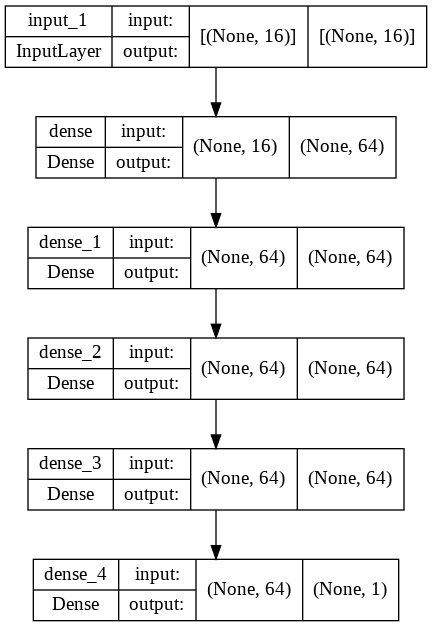

In [15]:
plot_model(model, show_shapes=True)

Modell compile

In [16]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['MeanSquaredError'])

In [17]:
early_stopping_callback = EarlyStopping(patience=20, restore_best_weights=True)

In [19]:
model.fit(x_train_e, y_train_e, batch_size=64, epochs=500, validation_split=0.1, callbacks=[early_stopping_callback])

Epoch 1/500
2/2 [==============================] - 1s 158ms/step - loss: 143.0631 - mean_squared_error: 143.0631 - val_loss: 132.6608 - val_mean_squared_error: 132.6608
Epoch 2/500
2/2 [==============================] - 0s 22ms/step - loss: 138.6256 - mean_squared_error: 138.6256 - val_loss: 129.5825 - val_mean_squared_error: 129.5825
Epoch 3/500
2/2 [==============================] - 0s 25ms/step - loss: 134.3762 - mean_squared_error: 134.3762 - val_loss: 126.5181 - val_mean_squared_error: 126.5181
Epoch 4/500
2/2 [==============================] - 0s 22ms/step - loss: 130.2722 - mean_squared_error: 130.2722 - val_loss: 123.3461 - val_mean_squared_error: 123.3461
Epoch 5/500
2/2 [==============================] - 0s 28ms/step - loss: 126.0053 - mean_squared_error: 126.0053 - val_loss: 119.8702 - val_mean_squared_error: 119.8702
Epoch 6/500
2/2 [==============================] - 0s 23ms/step - loss: 121.2777 - mean_squared_error: 121.2777 - val_loss: 115.9815 - val_mean_squared_error: 

Predikció a következő évi átlaghőmérsékletre

In [20]:
pred1=model.predict(x_test_e[:1])
pred1

array([[8.549767]], dtype=float32)

In [27]:
ev['avgtempC'].iloc[-1]

8

😎

##Egy nap becslése

In [46]:
napos=files.upload()

Saving nap.csv to nap.csv


In [47]:
nap=pd.read_csv('nap.csv')

In [48]:
print(nap.columns)

Index(['loc_id', 'date', 'maxtempC', 'maxtempF', 'mintempC', 'mintempF',
       'avgtempC', 'avgtempF', 'totalprecipMM', 'totalprecipIn',
       'windspeedMiles', 'windspeedKmph', 'sunhour', 'winddirdegree',
       'winddir16point', 'weatherCode', 'weatherIconUrl', 'weatherDesc',
       'humidity', 'visibilityKm', 'visibilityMiles', 'pressureMB',
       'pressureInches', 'cloudcover', 'HeatIndexC', 'HeatIndexF', 'DewPointC',
       'DewPointF', 'WindChillC', 'WindChillF', 'WindGustMiles',
       'WindGustKmph', 'FeelsLikeC', 'FeelsLikeF', 'sunrise', 'sunset',
       'moonrise', 'moonset'],
      dtype='object')


In [49]:
nap=nap.drop(columns=['loc_id','date','maxtempF','mintempF','avgtempF','totalprecipIn','windspeedMiles','winddir16point','weatherIconUrl','weatherDesc',
                      'visibilityMiles','pressureInches','HeatIndexF','DewPointF','WindChillF','WindGustMiles','FeelsLikeF'])

In [50]:
nap.head()

,maxtempC,mintempC,avgtempC,totalprecipMM,windspeedKmph,sunhour,winddirdegree,weatherCode,humidity,visibilityKm,...,cloudcover,HeatIndexC,DewPointC,WindChillC,WindGustKmph,FeelsLikeC,sunrise,sunset,moonrise,moonset
0,26,15,22,0.0,10,8.7,200,116,61,10,...,7,21,12,21,12,21,03:49 AM,08:08 PM,03:12 AM,05:45 PM
1,24,17,22,0.5,19,3.3,215,122,66,9,...,61,21,13,20,23,20,03:49 AM,08:09 PM,03:37 AM,06:59 PM
2,20,14,18,0.5,17,5.1,235,353,57,10,...,42,17,8,16,20,16,03:48 AM,08:10 PM,04:08 AM,08:13 PM
3,17,14,16,10.7,12,5.1,164,353,71,9,...,54,16,10,16,14,16,03:47 AM,08:11 PM,04:47 AM,09:23 PM
4,19,13,17,0.1,13,6.9,236,122,64,10,...,65,16,9,15,17,15,03:47 AM,08:12 PM,05:38 AM,10:23 PM


In [51]:
y_nap=nap['avgtempC'].copy()
y_nap=y_nap.drop(0, axis=0)
y_nap.shape

(60,)

In [52]:
x_nap=nap.copy().drop('avgtempC',axis=1)
x_nap=x_nap.drop(axis=0,index=(x_nap.shape[0]-1))
x_nap.shape

(60, 20)

Nagyon kevés megfigyelés, nagyon sok változó, valószínűleg nem érdemes folytatni a modellezést

##Egy óra becslése

In [29]:
oras=files.upload()

Saving ora.csv to ora.csv


In [30]:
ora=pd.read_csv('ora.csv')

In [10]:
ora.head()

,loc_id,date,time,isdaytime,tempC,tempF,windspeedMiles,windspeedKmph,winddirdegree,winddir16point,...,HeatIndexC,HeatIndexF,DewPointC,DewPointF,WindChillC,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF
0,1,2019-06-01,0,no,16,61,6,10,228,SW,...,16,61,12,54,16,61,7,12,16,61
1,1,2019-06-01,100,no,16,60,6,9,230,SW,...,16,60,12,53,16,60,7,11,16,60
2,1,2019-06-01,200,no,15,59,5,9,233,SW,...,15,59,11,53,15,59,6,10,15,59
3,1,2019-06-01,300,no,15,58,5,8,235,SW,...,15,58,11,52,14,58,6,9,14,58
4,1,2019-06-01,400,no,15,59,4,7,229,SW,...,15,59,11,52,15,59,5,8,15,59


In [31]:
ora=ora.drop(columns=['loc_id','date','time','isdaytime','tempF','windspeedMiles','winddir16point','weatherIconUrl','precipInches','visibilityMiles','pressureInches','HeatIndexF',
             'DewPointF','WindChillF','WindGustMiles','FeelsLikeF'])

In [32]:
labeler = LabelEncoder()

In [33]:
labeler.fit(ora.weatherDesc)

LabelEncoder()

In [34]:
ora.weatherDesc = labeler.transform(ora.weatherDesc)

In [35]:
y_ora=ora['tempC'].copy()
y_ora=y_ora.drop(0, axis=0)
y_ora.shape

(1463,)

In [36]:
x_ora=ora.copy().drop('tempC',axis=1)
x_ora.head()
x_ora=x_ora.drop(axis=0,index=(x_ora.shape[0]-1))
x_ora.shape

(1463, 14)

In [37]:
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(x_ora, y_ora, test_size=0.1, shuffle=True)

In [38]:
normalizer.fit(x_train_o)
x_train_o=normalizer.transform(x_train_o)
pd.DataFrame(x_train_o)
x_test_o = normalizer.transform(x_test_o)

In [39]:
input = Input(shape=(x_train_o.shape[1]))
x= Dense(64, activation='relu')(input)
x= Dense(64, activation='relu')(x)
x= Dense(64, activation='relu')(x)
x= Dense(64, activation='relu')(x)
output = Dense(1, activation = 'linear')(x)

In [40]:
model = keras.Model(input, output)

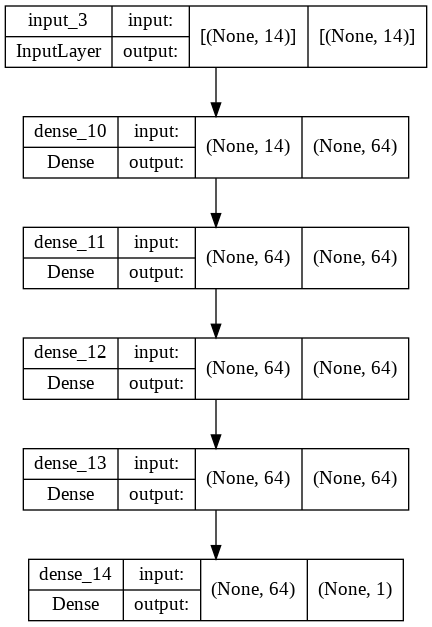

In [67]:
plot_model(model, show_shapes=True)

In [41]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['MeanSquaredError'])

In [42]:
early_stopping_callback = EarlyStopping(patience=20, restore_best_weights=True)

In [43]:
model.fit(x_train_o, y_train_o, batch_size=64, epochs=500, validation_split=0.1, callbacks=[early_stopping_callback])

Epoch 1/500
19/19 [==============================] - 1s 9ms/step - loss: 365.6723 - mean_squared_error: 365.6723 - val_loss: 315.7062 - val_mean_squared_error: 315.7062
Epoch 2/500
19/19 [==============================] - 0s 3ms/step - loss: 233.3223 - mean_squared_error: 233.3223 - val_loss: 77.3391 - val_mean_squared_error: 77.3391
Epoch 3/500
19/19 [==============================] - 0s 3ms/step - loss: 42.1929 - mean_squared_error: 42.1929 - val_loss: 16.8972 - val_mean_squared_error: 16.8972
Epoch 4/500
19/19 [==============================] - 0s 3ms/step - loss: 20.9933 - mean_squared_error: 20.9933 - val_loss: 12.1611 - val_mean_squared_error: 12.1611
Epoch 5/500
19/19 [==============================] - 0s 3ms/step - loss: 13.4896 - mean_squared_error: 13.4896 - val_loss: 9.2568 - val_mean_squared_error: 9.2568
Epoch 6/500
19/19 [==============================] - 0s 3ms/step - loss: 10.3168 - mean_squared_error: 10.3168 - val_loss: 7.3282 - val_mean_squared_error: 7.3282
Epoch 7/

In [44]:
pred3=model.predict(x_test_o[:1])
pred3

array([[19.639912]], dtype=float32)

In [45]:
ora['tempC'].iloc[-1]

18